<a href="https://colab.research.google.com/github/FrederDoll/PyDeep/blob/main/BurgerProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reproduce the -Burgers Equations with SciANN

Installing SCIANN.

the Oal of this Notebook is to be able to reproduce this Guys Work:
https://scholar.google.com/citations?user=ZrhiXDIAAAAJ&hl=en&oi=ao

This Paper Intrdoduces SciANN: 
https://arxiv.org/abs/2005.08803





In [ ]:
!pip install sciann 

In [ ]:
# You need to have tensorflow, keras, and sciann installed in your system. 

import numpy as np
import matplotlib.pyplot as plt 
import sciann as sn 
from numpy import pi
from sciann.utils.math import diff, sign, sin


# Burgers problem  
    
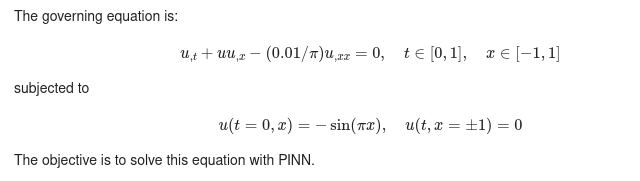

#Setting up /understanding the NN 
The first step is to construct the approximation space.

The independent variables are: (t,x)

The field variable is: u(t, x)

The neural network approximation is defined as: 
$\hat{u}: (t, x) \mapsto \mathcal{N}_u(t,x; \mathbf{W}, \mathcal{b})$


We are Using 8 hidden Layers with 20 Neural units and hyperbolic - tangent activation function 

**WHY DONT WE JUST USE RELU OR SOMETHING SIMILAR (DERIVATION**



In [ ]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [t,x], 8*[20], 'tanh')

#Setting up optimazation problem: 

The second step is to set up the optimization model using SciModel interface. Input variables are (t,x) and targets are:

In [ ]:
L1 = diff(u, t) + u*diff(u,x) - (0.01/pi)*diff(u, x, order=2)
#Using the sciann diff funktion

#Boundary Conditions:
TOL = 0.001
C1 = (1-sign(t - TOL)) * (u + sin(pi*x))
C2 = (1-sign(x - (-1+TOL))) * (u)
C3 = (1+sign(x - ( 1-TOL))) * (u)

#defining the SciModel with multiple objects: 
m = sn.SciModel([x, t], [L1, C1, C2, C3])

#Sampling grid 
To train the network, we need to define a sampling (collocation) grid.

USING NUMPY

In [ ]:
x_data, t_data = np.meshgrid(
    np.linspace(-1, 1, 100), 
    np.linspace(0, 1, 100)
)


#Training

In [ ]:
h = m.train([x_data, t_data], 4*['zero'], learning_rate=0.02, epochs=5000, verbose=0)


Total samples: 10000 
Batch size: 64 
Total batches: 157 


Epoch 00651: ReduceLROnPlateau reducing learning rate to 0.009999999776482582.

Epoch 01793: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.

Epoch 03114: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.

Epoch 04184: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.

Epoch 04684: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.


In [ ]:
x_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 200), 
    np.linspace(0, 1, 200)
)
u_pred = u.eval(m, [x_test, t_test])



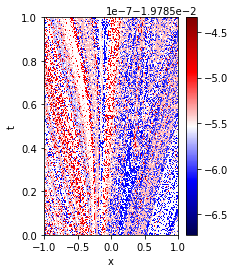

In [ ]:
fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, u_pred, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()